# BERT research


BERT Paper
Method to apply pre-trained language representations to downstream task
1.	Feature Based
ELMo: Use task-specific architecture that include pre-trained representation as additional feature
2.	Fine-tuning
OpenAI GPT: introduce minimal task-specific parameters, and is trained on downstream task by simply fine-tuning all pretrained parameters




Two approach share same objective function, use unidirectional language model to learn general language representation


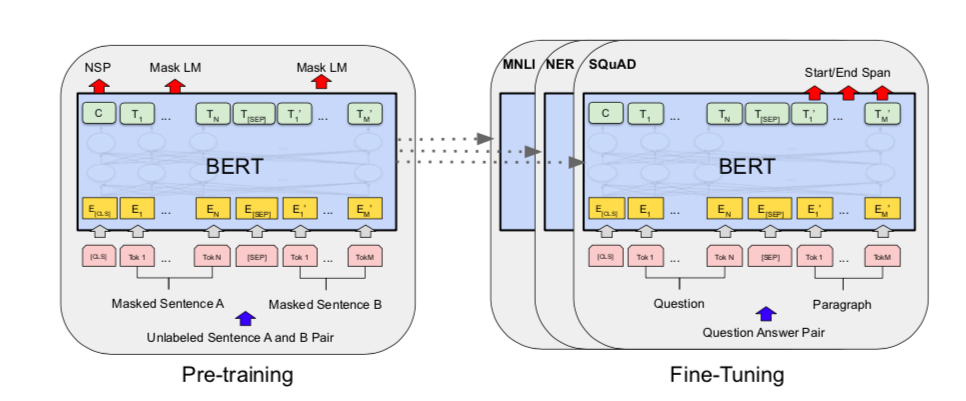

## Limitation

OpenAI GPT use left-to-right architecture.
This architecture is suboptimal for sentence-level task very harmful when applying fine-tuning based approach to token-level task like question answering


## Masked language model(MLM) 

Randomly masks some of  the tokens from the input, objective is to predict the original vocabulary id of the masked word based only on its context
This enable the representation to fuse the left and the right context, which allow us to pretrain a deep bidirectional transformer.


“Next sentence prediction” task: 
Pretrain text-pair representation

## Unsupervised Feature-based Approach

Sentence Embedding/ Paragraph embedding

To train sentence representations, prior work has used objectives to rank candidate next sentences, left-to-right generation of next sentence words given a representation of the previous sentence.
ELMo extract context-sensitive features from a left-to-right and a right-to-left language model.
The contextual representation of each token is the concatenation of the left-to-right and right-to-left representations.
ELMo improves performance of question answering, sentiment analysis, and named entity recognition.

## Unsupervised Fine-tuning Approach 


Sentence or document encoders which produce contextual token representations have been pre-trianed from unlabeled text and fine-tuned for a supervised downstream task.
OpenAI GPT achive state-of-the-art result on many sentence level tasks from GLUE benchmark


GLUE: The General Language Understanding Evaluation

BERT code and pretrained model
https://github.com/google-research/bert

## Transfer Learning from Supervised Data

Effective transfer from supervised tasks with large datasets, such as natural language inference and machine translation
Computer vision: fine-tune models pretrained with ImageNet

## 3.BERT

Two step: pre-training and fine-tuning
1. Pre-training: model is trained on unlabeled data over different pre-training tasks
2. Fine-tuning: first initialized with the pre-trained parameters, and all of the param- eters are fine-tuned using labeled data from the downstream tasks

A distinctive feature of BERT is its unified ar- chitecture across different tasks. There is minimal difference between the pre-trained architec- ture and the final downstream architecture.

## Model Architecture

+ L:the number of layers (i.e., Transformer blocks)
+ H:the hidden size
+ A:the number of self-attention heads

BERTBASE (L=12, H=768, A=12, Total Param- eters=110M) and BERTLARGE (L=24, H=1024, A=16, Total Parameters=340M).

BERTLARGE (L=24, H=1024, A=16, Total Parameters=340M)

### Input/Output Representation 

To make BERT handle a variety of down-stream tasks, our input representation is able to unambiguously represent both a single sentence and a pair of sentences (e.g., ⟨ Question, Answer ⟩) in one token sequence.

 + “sentence” can be an arbitrary span of contiguous text, rather than an actual linguistic sentence. 
 + “sequence” refers to the input token sequence to BERT, which may be a single sentence or two sentences packed together.

WordPiece embeddings (Wu et al., 2016) with a 30,000 token vocabulary.

The first token of every sequence is always a special classification token ([CLS]).  
The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks. 

Sentence pairs are packed together into a single sequence. We differentiate the sentences in two ways. 
1. First, we separate them with a special token ([SEP]). 
2. Second, we add a learned embedding to every token indicating whether it belongs to sentence A or sentence B. As shown in Figure 1, we denote input embedding as E, the final hidden vector of the special [CLS] token as C ∈ RH, and the final hidden vector for the ith input token asTi ∈RH.

For a given token, its input representation is constructed by summing the corresponding token, segment, and position embeddings. 

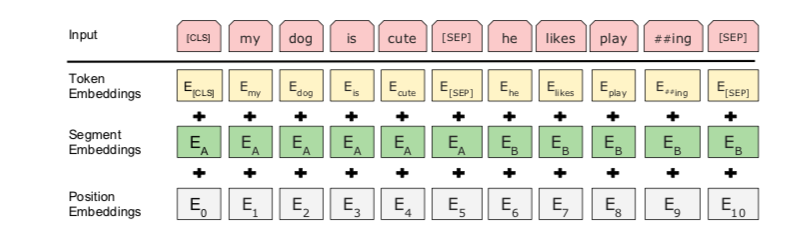

### 3.1 Pre-training BERT 

Unlike Peters et al. (2018a) and Radford et al. (2018), we do not use traditional left-to-right or right-to-left language models to pre-train BERT. Instead, we pre-train BERT using two unsuper- vised tasks, described in this section.

#### Task #1: Masked LM 

Unsupervised Fine-tuning Approach
Sentence or document encoders which produce contextual token representations have been pre-trianed from unlabeled text and fine-tuned for a supervised downstream task.
OpenAI GPT achive state-of-the-art result on many sentence level tasks from GLUE benchmark
GLUE: The General Language Understanding Evaluation

Transfer Learning from Supervised Data
Effective transfer from supervised tasks with large datasets, such as natural language inference and machine translation
Computer vision: fine-tune models pretrained with ImageNet

BERT
Two step: pre-training and fine-tuning
Pre-training: model is trained on unlabeled data over different pre-training tasks
Fine-tuning: first initialized with the pre-trained parameters, and all of the param- eters are fine-tuned using labeled data from the downstream tasks

A distinctive feature of BERT is its unified ar- chitecture across different tasks. There is minimal difference between the pre-trained architec- ture and the final downstream architecture.


L:the number of layers (i.e., Transformer blocks)
H:the hidden size
A:the number of self-attention heads

Model Architecture:

BERTBASE (L=12, H=768, A=12, Total Param- eters=110M) and BERTLARGE (L=24, H=1024, A=16, Total Parameters=340M).


In [ ]:
#Method 1
from pytorch_pretrained_bert import BertTokenizer, BertForSequenceClassification
from pytorch_pretrained_bert.modeling import BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenized_text = tokenizer.tokenize(pad_text)

indexed_tok = tokenizer.convert_tokens_to_ids(tok_text)

tokenized_text = [tokenizer.tokenize(i) for i in train_samples]
input_ids = [tokenizer.convert_tokens_to_ids(i) for i in tokenized_text]
input_labels = get_dummies(train_labels)  # 使用 get_dummies 函数转换标签

train_set = TensorDataset(torch.LongTensor(input_ids),
                          torch.FloatTensor(input_labels))
train_loader = DataLoader(dataset=train_set,
                          batch_size=4,
                          shuffle=True)